<a href="https://colab.research.google.com/github/doronschwartz/NLP/blob/main/HW1/Word_Cloud_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code reads a file from my Github repo and puts it into a dataframe.

In [ ]:
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
file_path = 'https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true'
israel = pd.read_excel(file_path)

In [ ]:
israel

,Content,Location
0,"""06:30,"" a documentary project filmed in Tel A...",NaN
1,"""Fourteen residents of Kibbutz Nahal Oz were m...",NaN
2,"""Releasing the hostages is the supreme task. T...",NaN
3,"""Unorthodox"" author @Deborah_Feldman has been ...",NaN
4,"""We will have to make difficult decisions in t...",NaN
...,...,...
470,"White nationalists, usually anti-Muslim bigots...",NaN
471,"Why Israel agreed to the hostage deal, and how...",NaN
472,With the rise of campus antisemitism around th...,NaN
473,WZO offers mobile showers for IDF soldiers in ...,NaN


Palestine Words upload

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
file_path = 'https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true'
pal = pd.read_excel(file_path)

In [ ]:
pal

,Content
0,": Qatar, the mediator in the Gaza truce talks,..."
1,Hamas says it holds US President Joe Biden and...
2,Israeli attacks in the besieged Gaza Strip amo...
3,Israeli warplanes and artillery bomb several a...
4,"""Israel respects no international laws or conv..."
...,...
470,3-year-old Ahmad Shabat lost his legs in an Is...
471,"Thread At least 5,500 Palestinian children in ..."
472,#BREAKING The Israeli military has published f...
473,BREAKING: South Africa's Parliament votes in f...


Honestly, this code was generated when I prompted GPT with this:

I have a file, "https://github.com/rosenfa/ai/blob/master/news-israel.xlsx" that is a text file with one field with the field name "Content".  How do I create a word cloud in python. Please provide full code with sklearn

Israel basic wordcloud

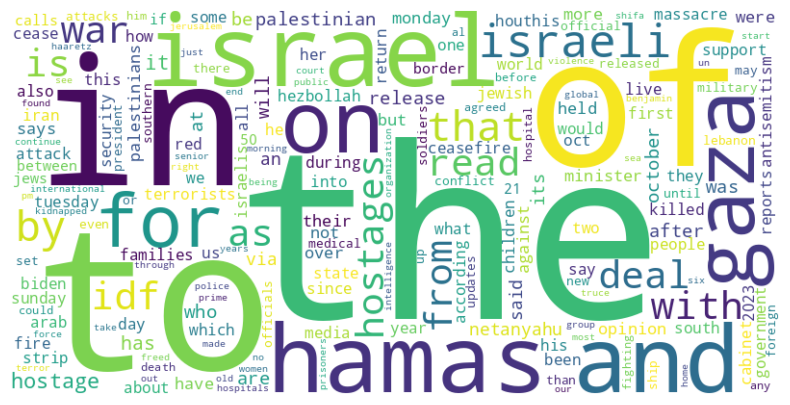

In [ ]:
# Extract the 'Content' column
content = israel['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Palestine simple World Cloud

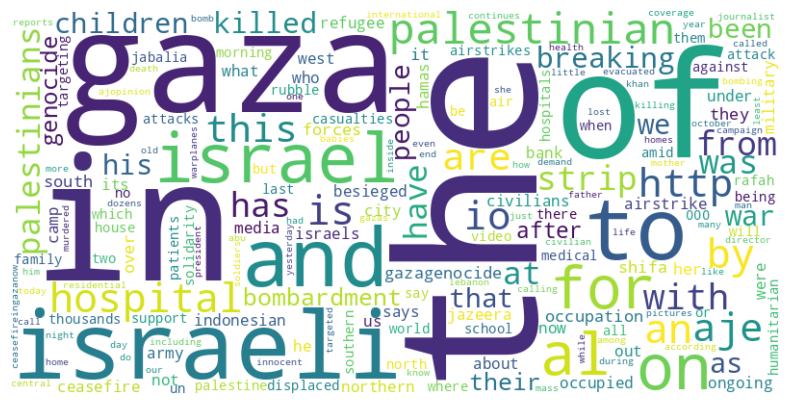

In [ ]:
# Extract the 'Content' column
content = pal['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2.)  One set with only the stop words taken out


Israel

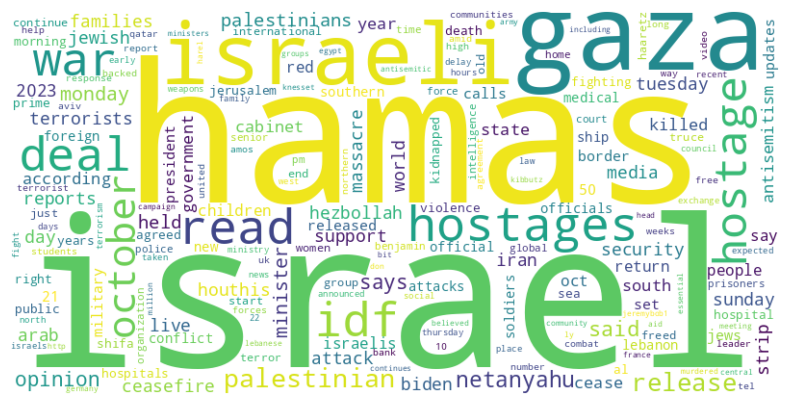

In [ ]:
# Extract the 'Content' column
content = israel['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Palestine

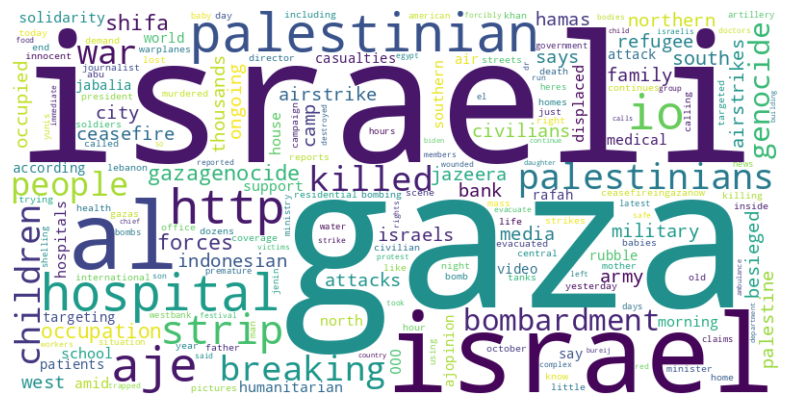

In [ ]:
# Extract the 'Content' column
content = pal['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3.)One set with the Porter Stemmer and stop words still out

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Israel

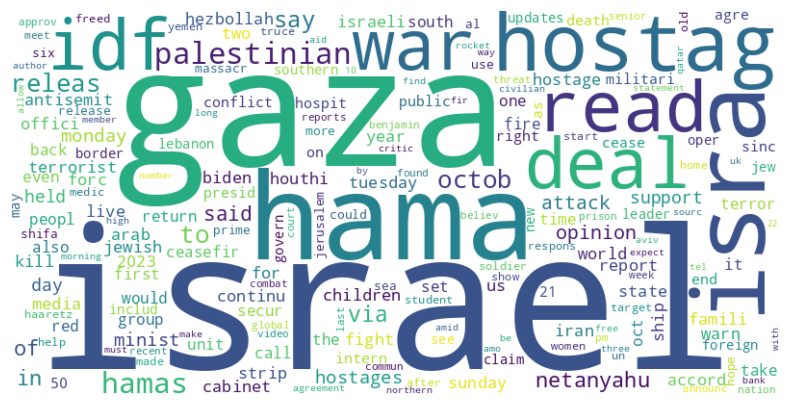

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the 'Content' column
content = israel['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use Porter Stemmer and remove stop words
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
preprocessed_text = ' '.join([porter.stem(word) for word in all_text.split() if word.lower() not in stop_words])

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([preprocessed_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Palestine

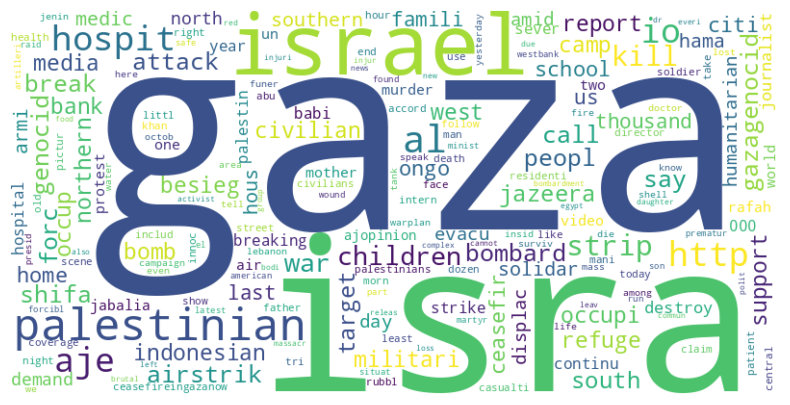

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the 'Content' column
content = pal['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use Porter Stemmer and remove stop words
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
preprocessed_text = ' '.join([porter.stem(word) for word in all_text.split() if word.lower() not in stop_words])

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([preprocessed_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4.) One set with lemmatization (and not the Porter stemmer)


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Israel

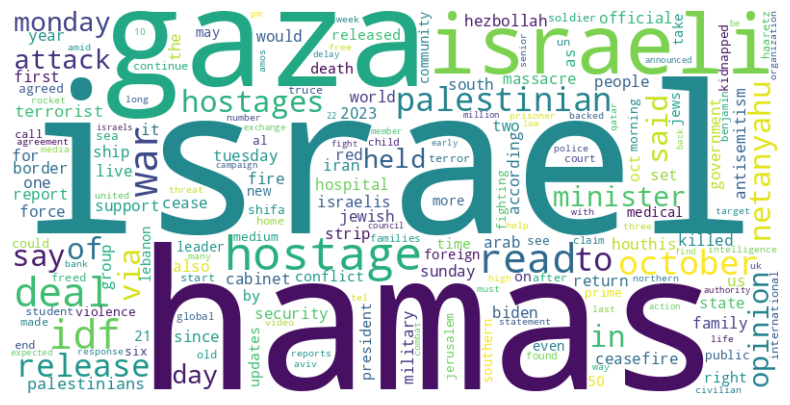

In [ ]:
# Extract the 'Content' column
content = israel['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use WordNet Lemmatizer and remove stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
preprocessed_text = ' '.join([lemmatizer.lemmatize(word) for word in all_text.split() if word.lower() not in stop_words])

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([preprocessed_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Palestine

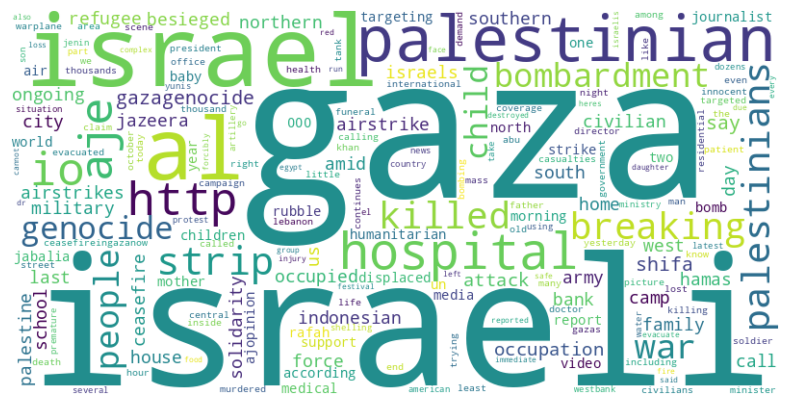

In [ ]:
# Extract the 'Content' column
content = pal['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())

# Use WordNet Lemmatizer and remove stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
preprocessed_text = ' '.join([lemmatizer.lemmatize(word) for word in all_text.split() if word.lower() not in stop_words])

# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([preprocessed_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()